<a href="https://colab.research.google.com/github/Rodrigo2S/Atividade_Validando_o_Dataset/blob/main/Atividade_Validando_o_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [19]:
PROJECT_ID = 'ds-project-353020'

In [20]:
QUERY = f'''WITH usuarios AS (
                SELECT
                    id as user_id,
                    operating_system,
                    salary,
                    credit_score,
                    date_birth,
                    DATE_DIFF(DATE(DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY)), DATE(date_birth), YEAR) as age
                FROM
                `ds-project-353020.app_data.users_profile`
), eventos AS (
                SELECT
                    user_id,
                    SUM(CASE WHEN event_name = 'app.home_view' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) AS qtd_home_view_last_7_days,
                    SUM(CASE WHEN event_name = 'app.home_view' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) AS qtd_home_view_last_15_days,
                    SUM(CASE WHEN event_name = 'app.search' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) AS qtd_searches_last_7_days,
                    SUM(CASE WHEN event_name = 'app.search' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) AS qtd_searches_last_15_days,
                    SUM(CASE WHEN event_name = 'app.search' AND section = 'restaurant' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) AS qtd_restaurant_searches_last_7_days,
                    SUM(CASE WHEN event_name = 'app.search' AND section = 'restaurant' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) AS qtd_restaurant_searches_last_15_days,
                    SUM(CASE WHEN event_name = 'app.search' AND section = 'supermarket' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) AS qtd_supermarket_searches_last_7_days,
                    SUM(CASE WHEN event_name = 'app.search' AND section = 'supermarket' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) AS qtd_supermarket_searches_last_15_days,
                    SUM(CASE WHEN event_name = 'app.added_to_cart' AND section = 'restaurant' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) AS sum_total_value_restaurant_add_cart_last_7_days,   
                    SUM(CASE WHEN event_name = 'app.added_to_cart' AND section = 'restaurant' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) AS sum_total_value_restaurant_add_cart_last_15_days,
                    SUM(CASE WHEN event_name = 'app.added_to_cart' AND section = 'supermarket' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) AS sum_total_value_supermarket_add_cart_last_7_days,   
                    SUM(CASE WHEN event_name = 'app.added_to_cart' AND section = 'supermarket' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) AS sum_total_value_supermarket_add_cart_last_15_days    
                FROM
                `ds-project-353020.app_data.events`
                WHERE DATE(date) <= DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) -- selecionando apenas eventos anteriores a data de corte, 7 dia antes da ultima data disponivel na base de dados
                GROUP BY user_id
), pedidos_anteriores AS (
                        SELECT 
                            user_id,
                            SUM(total_value) as sum_total_value_orders,
                            AVG(total_value) as avg_total_value_orders,
                            SUM(CASE WHEN section = 'restaurant' THEN total_value END ) AS sum_total_value_restaurant_orders,
                            SUM(CASE WHEN section = 'supermarket' THEN total_value END ) AS sum_total_value_supermarket_orders,  
                            AVG(CASE WHEN section = 'restaurant' THEN total_value END ) AS avg_total_value_restaurant_orders,
                            AVG(CASE WHEN section = 'supermarket' THEN total_value END ) AS avg_total_value_supermarket_orders,  
                            SUM(CASE WHEN DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) as sum_total_value_orders_last_7_days,
                            SUM(CASE WHEN DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) as sum_total_value_orders_last_15_days,
                            AVG(CASE WHEN DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) as avg_total_value_orders_last_7_days,
                            AVG(CASE WHEN DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) as avg_total_value_orders_last_15_days,
                            SUM(CASE WHEN section = 'restaurant' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) as sum_total_value_restaurant_orders_last_7_days,
                            SUM(CASE WHEN section = 'restaurant' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) as sum_total_value_restaurant_orders_last_15_days,
                            SUM(CASE WHEN section = 'supermarket' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) as sum_total_value_supermarket_orders_last_7_days,
                            SUM(CASE WHEN section = 'supermarket' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN total_value ELSE 0 END) as sum_total_value_supermarket_orders_last_15_days,
                            COUNT(*) as qtd_orders,
                            SUM(CASE WHEN DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) as qtd_orders_last_7_days,
                            SUM(CASE WHEN DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) as qtd_orders_last_15_days,
                            SUM(CASE WHEN section = 'restaurant' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) as qtd_restaurant_orders_last_7_days,
                            SUM(CASE WHEN section = 'restaurant' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) as qtd_restaurant_orders_last_15_days,
                            SUM(CASE WHEN section = 'supermarket' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -14 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) as qtd_supermarket_orders_last_7_days,
                            SUM(CASE WHEN section = 'supermarket' AND DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -22 DAY) AND DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) THEN 1 ELSE 0 END) as qtd_supermarket_orders_last_15_days,
                            SUM(CASE WHEN payment_method = 'credit_card' THEN 1 ELSE 0 END) / COALESCE(COUNT(*), 1) AS taxa_credit_card_payments
                        FROM
                            `ds-project-353020.app_data.orders`
                        WHERE DATE(date) <= DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) -- selecionando apenas pedidos anteriores a data de corte, 7 dia antes da ultima data disponivel na base de dados
                        GROUP BY user_id

), target AS (
            SELECT 
                user_id,
                MAX(CASE WHEN DATE(date) BETWEEN DATE_ADD(DATE "2021-05-31", INTERVAL -7 DAY) AND DATE('2021-05-31') THEN 1 ELSE 0 END) AS target
            FROM
            `ds-project-353020.app_data.orders`
            GROUP BY user_id
)
SELECT 
    usuarios.user_id,
    usuarios.operating_system,
    usuarios.salary,
    usuarios.credit_score,
    usuarios.age,
    eventos.qtd_home_view_last_7_days,
    eventos.qtd_home_view_last_15_days,
    eventos.qtd_searches_last_7_days,
    eventos.qtd_searches_last_15_days,
    eventos.qtd_restaurant_searches_last_7_days,
    eventos.qtd_restaurant_searches_last_15_days,
    eventos.qtd_supermarket_searches_last_7_days,
    eventos.qtd_supermarket_searches_last_15_days,
    eventos.sum_total_value_restaurant_add_cart_last_7_days,   
    eventos.sum_total_value_restaurant_add_cart_last_15_days,
    eventos.sum_total_value_supermarket_add_cart_last_7_days,   
    eventos.sum_total_value_supermarket_add_cart_last_15_days,    
    pedidos_anteriores.sum_total_value_orders,
    pedidos_anteriores.avg_total_value_orders,
    pedidos_anteriores.sum_total_value_restaurant_orders,
    pedidos_anteriores.sum_total_value_supermarket_orders,  
    pedidos_anteriores.avg_total_value_restaurant_orders,
    pedidos_anteriores.avg_total_value_supermarket_orders,  
    pedidos_anteriores.sum_total_value_orders_last_7_days,
    pedidos_anteriores.sum_total_value_orders_last_15_days,
    pedidos_anteriores.avg_total_value_orders_last_7_days,
    pedidos_anteriores.avg_total_value_orders_last_15_days,
    pedidos_anteriores.sum_total_value_restaurant_orders_last_7_days,
    pedidos_anteriores.sum_total_value_restaurant_orders_last_15_days,
    pedidos_anteriores.sum_total_value_supermarket_orders_last_7_days,
    pedidos_anteriores.sum_total_value_supermarket_orders_last_15_days,
    pedidos_anteriores.qtd_orders_last_7_days,
    pedidos_anteriores.qtd_orders_last_15_days,
    pedidos_anteriores.qtd_restaurant_orders_last_7_days,
    pedidos_anteriores.qtd_restaurant_orders_last_15_days,
    pedidos_anteriores.qtd_supermarket_orders_last_7_days,
    pedidos_anteriores.qtd_supermarket_orders_last_15_days,
    pedidos_anteriores.taxa_credit_card_payments,
    target.target
FROM 
usuarios
LEFT JOIN
eventos
ON usuarios.user_id = eventos.user_id
LEFT JOIN
pedidos_anteriores
ON usuarios.user_id = pedidos_anteriores.user_id
LEFT JOIN 
target
ON usuarios.user_id = target.user_id 
'''

In [21]:
df = pd.io.gbq.read_gbq(QUERY, project_id=PROJECT_ID)

In [22]:
pd.options.display.max_columns = None
df.head()

,user_id,operating_system,salary,credit_score,age,qtd_home_view_last_7_days,qtd_home_view_last_15_days,qtd_searches_last_7_days,qtd_searches_last_15_days,qtd_restaurant_searches_last_7_days,qtd_restaurant_searches_last_15_days,qtd_supermarket_searches_last_7_days,qtd_supermarket_searches_last_15_days,sum_total_value_restaurant_add_cart_last_7_days,sum_total_value_restaurant_add_cart_last_15_days,sum_total_value_supermarket_add_cart_last_7_days,sum_total_value_supermarket_add_cart_last_15_days,sum_total_value_orders,avg_total_value_orders,sum_total_value_restaurant_orders,sum_total_value_supermarket_orders,avg_total_value_restaurant_orders,avg_total_value_supermarket_orders,sum_total_value_orders_last_7_days,sum_total_value_orders_last_15_days,avg_total_value_orders_last_7_days,avg_total_value_orders_last_15_days,sum_total_value_restaurant_orders_last_7_days,sum_total_value_restaurant_orders_last_15_days,sum_total_value_supermarket_orders_last_7_days,sum_total_value_supermarket_orders_last_15_days,qtd_orders_last_7_days,qtd_orders_last_15_days,qtd_restaurant_orders_last_7_days,qtd_restaurant_orders_last_15_days,qtd_supermarket_orders_last_7_days,qtd_supermarket_orders_last_15_days,taxa_credit_card_payments,target
0,8792,android,4682.76,781,47,4.0,12.0,8.0,15.0,2.0,3.0,1.0,4.0,84.01,366.20,11.00,208.17,2893.98,55.653462,533.99,284.00,16.181515,56.800000,1067.01,1971.89,20.519423,37.920962,84.01,366.20,11.00,208.17,15.0,38.0,10.0,26.0,2.0,4.0,0.769231,1.0
1,15536,ios,2675.78,551,47,5.0,12.0,23.0,45.0,7.0,18.0,9.0,15.0,212.00,406.34,901.00,969.58,1363.54,29.011489,504.90,750.64,22.950000,35.744762,752.96,1014.13,16.020426,21.577234,182.32,341.68,570.64,639.22,13.0,27.0,8.0,15.0,5.0,11.0,0.851064,1.0
2,16944,ios,3278.60,814,47,6.0,14.0,19.0,45.0,7.0,16.0,8.0,22.0,619.99,880.73,1530.01,1742.91,2754.75,45.159836,946.98,1799.77,31.566000,64.277500,1759.35,2192.71,28.841803,35.946066,505.18,733.32,1248.17,1451.39,17.0,39.0,8.0,19.0,8.0,17.0,0.786885,1.0
3,19636,ios,5209.68,606,47,0.0,0.0,12.0,16.0,10.0,14.0,0.0,0.0,986.00,2134.63,0.00,28.00,3008.99,158.367895,2980.99,28.00,165.610556,28.000000,986.00,2162.63,51.894737,113.822632,986.00,2134.63,0.00,28.00,9.0,16.0,9.0,15.0,0.0,1.0,0.736842,1.0
4,19294,ios,126.51,642,47,7.0,16.0,10.0,17.0,5.0,10.0,3.0,3.0,558.99,889.67,1240.00,2335.11,4149.73,125.749394,1130.17,3019.56,45.206800,377.445000,1798.99,2700.58,54.514848,81.835758,558.99,844.58,1240.00,1856.00,13.0,22.0,10.0,18.0,3.0,4.0,0.818182,1.0


In [23]:
df.shape

(20000, 39)

**temos 20 mil linhas e 39 colunas**

## Verificando se a quantidade de linhas confere com a quantidade de usuários distintos

In [24]:
df.user_id.nunique()

20000

In [25]:
df.shape[0] == df.user_id.nunique()

True

### Verificando o tipo de cada uma das colunas

In [26]:
df.dtypes

user_id                                                int64
operating_system                                      object
salary                                               float64
credit_score                                           int64
age                                                    int64
qtd_home_view_last_7_days                            float64
qtd_home_view_last_15_days                           float64
qtd_searches_last_7_days                             float64
qtd_searches_last_15_days                            float64
qtd_restaurant_searches_last_7_days                  float64
qtd_restaurant_searches_last_15_days                 float64
qtd_supermarket_searches_last_7_days                 float64
qtd_supermarket_searches_last_15_days                float64
sum_total_value_restaurant_add_cart_last_7_days      float64
sum_total_value_restaurant_add_cart_last_15_days     float64
sum_total_value_supermarket_add_cart_last_7_days     float64
sum_total_value_supermar

#### Não Achei necessário ajustar o Tipo de nenhuma delas

## Verificando as colunas com valores nulos

In [36]:
import missingno as msno

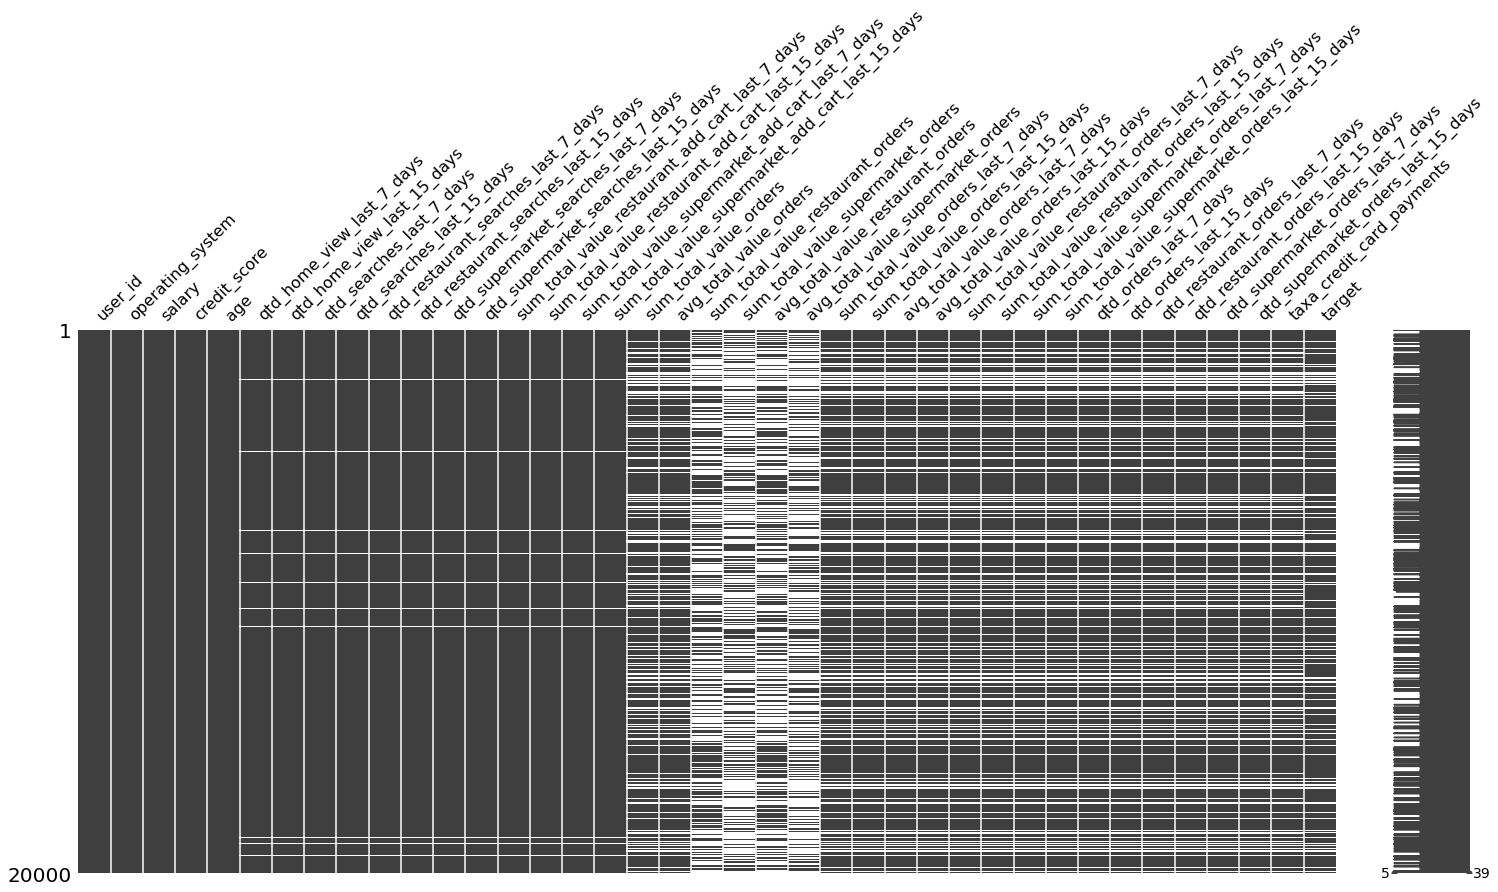

In [37]:
%matplotlib inline
msno.matrix(df.sample(frac=1));

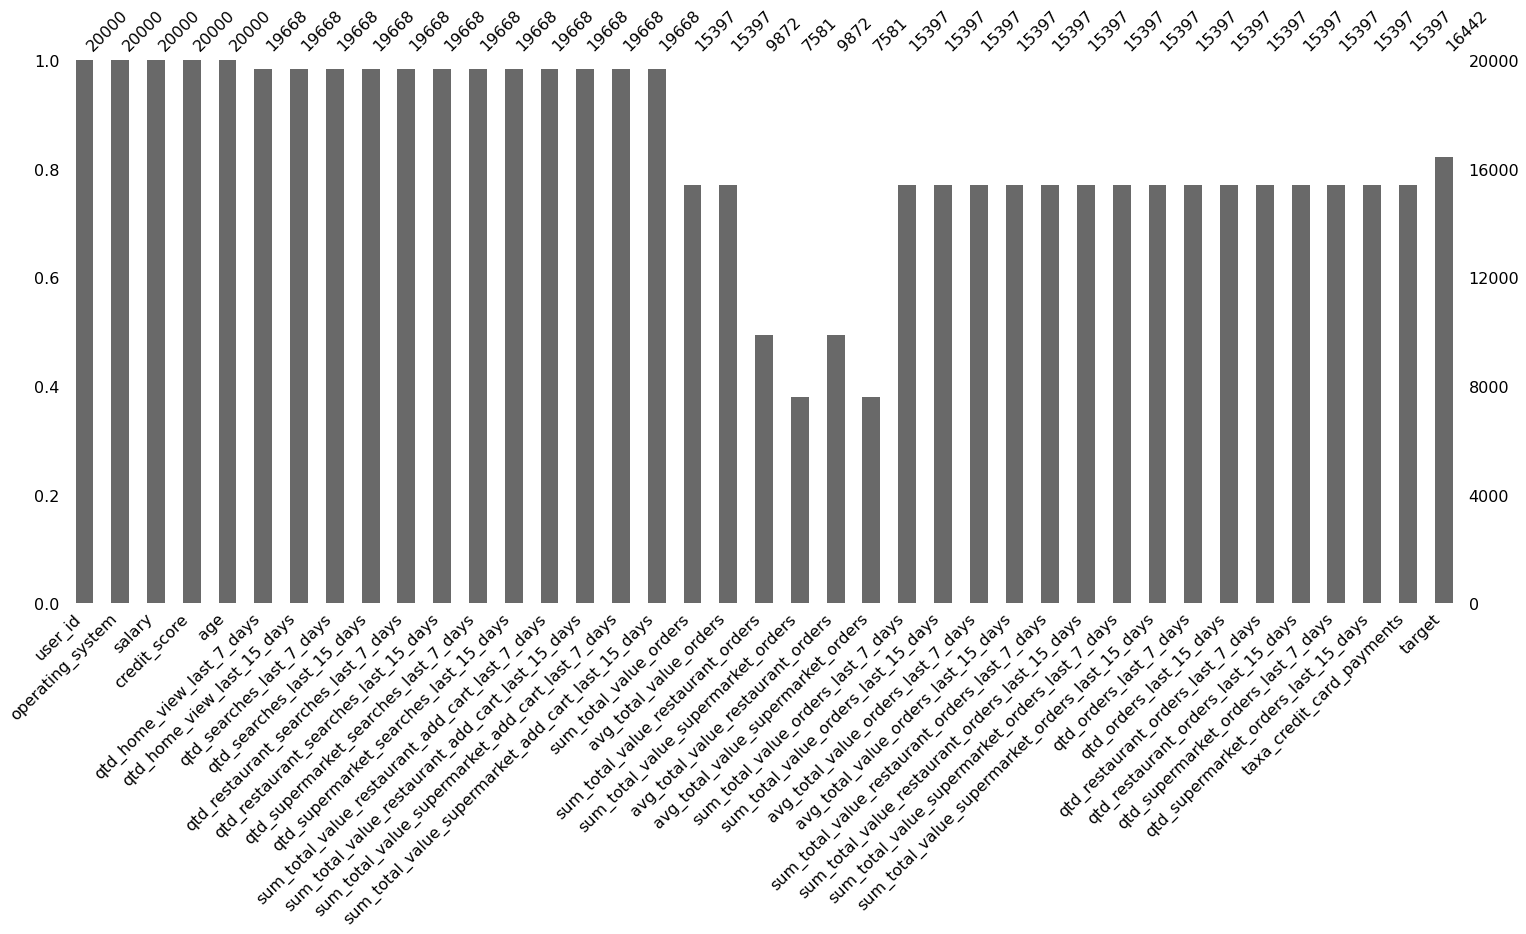

In [38]:
msno.bar(df.sample(frac=1));

In [39]:
(100 * df.isnull().sum() / df.shape[0]) 

user_id                                               0.000
operating_system                                      0.000
salary                                                0.000
credit_score                                          0.000
age                                                   0.000
qtd_home_view_last_7_days                             1.660
qtd_home_view_last_15_days                            1.660
qtd_searches_last_7_days                              1.660
qtd_searches_last_15_days                             1.660
qtd_restaurant_searches_last_7_days                   1.660
qtd_restaurant_searches_last_15_days                  1.660
qtd_supermarket_searches_last_7_days                  1.660
qtd_supermarket_searches_last_15_days                 1.660
sum_total_value_restaurant_add_cart_last_7_days       1.660
sum_total_value_restaurant_add_cart_last_15_days      1.660
sum_total_value_supermarket_add_cart_last_7_days      1.660
sum_total_value_supermarket_add_cart_las

### Preenchendo valores nulos com ' 0 ' para não atrapalhar minha bvase de dados

In [40]:
df.columns

Index(['user_id', 'operating_system', 'salary', 'credit_score', 'age',
       'qtd_home_view_last_7_days', 'qtd_home_view_last_15_days',
       'qtd_searches_last_7_days', 'qtd_searches_last_15_days',
       'qtd_restaurant_searches_last_7_days',
       'qtd_restaurant_searches_last_15_days',
       'qtd_supermarket_searches_last_7_days',
       'qtd_supermarket_searches_last_15_days',
       'sum_total_value_restaurant_add_cart_last_7_days',
       'sum_total_value_restaurant_add_cart_last_15_days',
       'sum_total_value_supermarket_add_cart_last_7_days',
       'sum_total_value_supermarket_add_cart_last_15_days',
       'sum_total_value_orders', 'avg_total_value_orders',
       'sum_total_value_restaurant_orders',
       'sum_total_value_supermarket_orders',
       'avg_total_value_restaurant_orders',
       'avg_total_value_supermarket_orders',
       'sum_total_value_orders_last_7_days',
       'sum_total_value_orders_last_15_days',
       'avg_total_value_orders_last_7_days',
  

In [41]:
COLS_TO_FILL = [
'qtd_home_view_last_7_days'    
,'qtd_home_view_last_15_days'                            
,'qtd_searches_last_7_days'                              
,'qtd_searches_last_15_days'                             
,'qtd_restaurant_searches_last_7_days'                   
,'qtd_restaurant_searches_last_15_days'                  
,'qtd_supermarket_searches_last_7_days'                  
,'qtd_supermarket_searches_last_15_days'                 
,'sum_total_value_restaurant_add_cart_last_7_days'       
,'sum_total_value_restaurant_add_cart_last_15_days'      
,'sum_total_value_supermarket_add_cart_last_7_days'      
,'sum_total_value_supermarket_add_cart_last_15_days'     
,'sum_total_value_orders'                                
,'avg_total_value_orders'                                
,'sum_total_value_restaurant_orders'                     
,'sum_total_value_supermarket_orders'                    
,'avg_total_value_restaurant_orders'                     
,'avg_total_value_supermarket_orders'                    
,'sum_total_value_orders_last_7_days'                    
,'sum_total_value_orders_last_15_days'                   
,'avg_total_value_orders_last_7_days'                    
,'avg_total_value_orders_last_15_days'                   
,'sum_total_value_restaurant_orders_last_7_days'         
,'sum_total_value_restaurant_orders_last_15_days'        
,'sum_total_value_supermarket_orders_last_7_days'        
,'sum_total_value_supermarket_orders_last_15_days'       
,'qtd_orders_last_7_days'                                
,'qtd_orders_last_15_days'                               
,'qtd_restaurant_orders_last_7_days'                     
,'qtd_restaurant_orders_last_15_days'                    
,'qtd_supermarket_orders_last_7_days'                    
,'qtd_supermarket_orders_last_15_days'                   
,'taxa_credit_card_payments'                             
,'target'                                                
]

In [42]:
df['taxa_credit_card_payments'].fillna(df['taxa_credit_card_payments'].dropna().mean(), inplace=True)

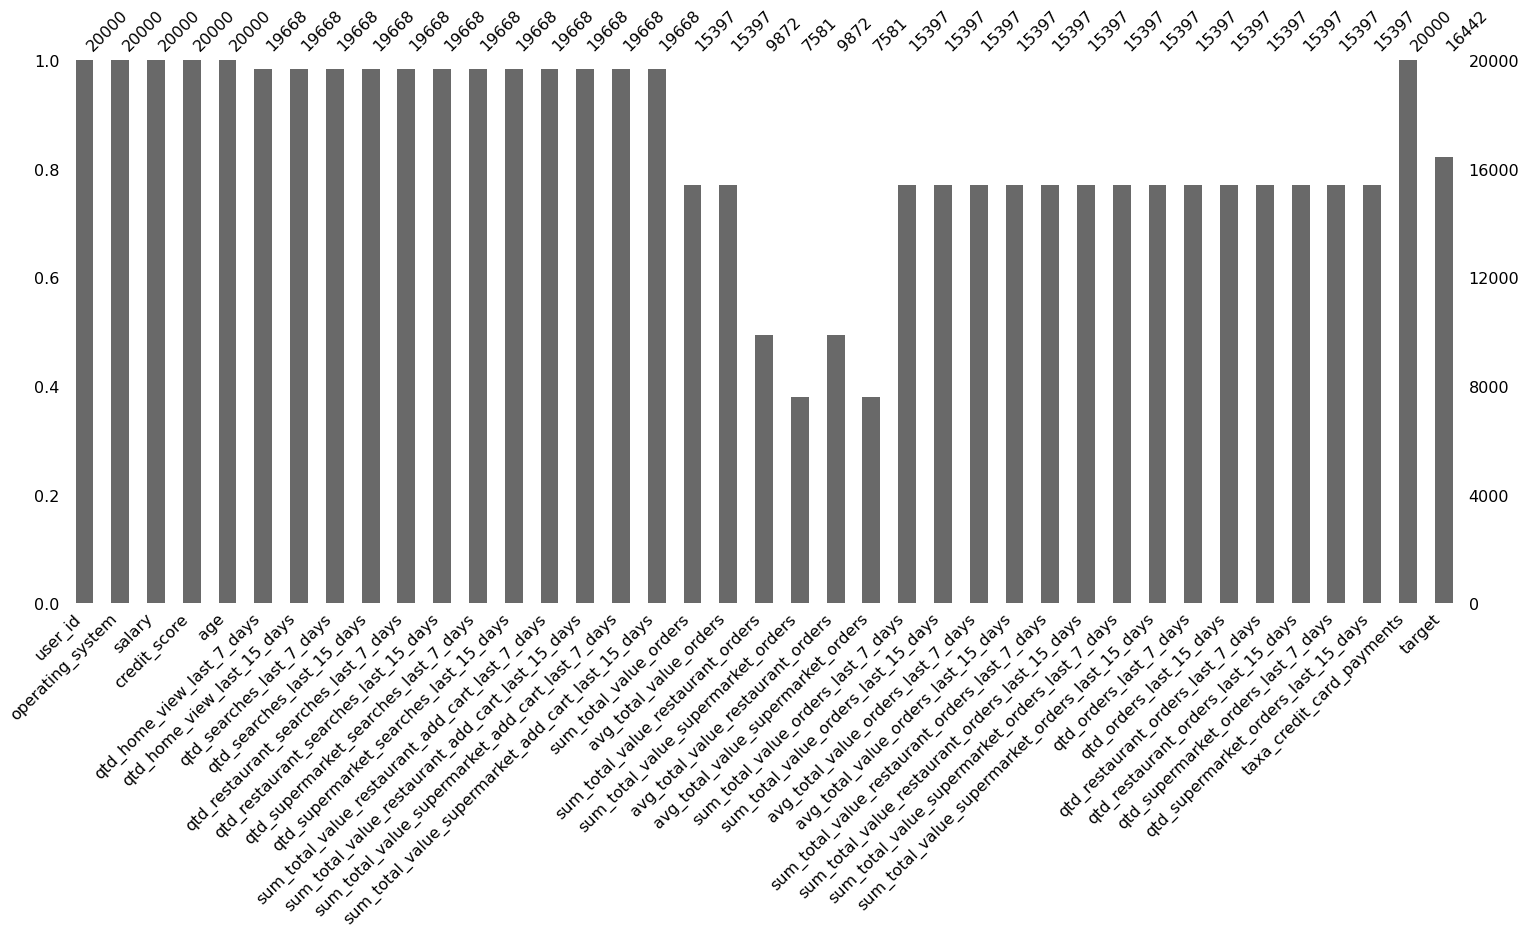

In [43]:
msno.bar(df.sample(frac=1));

### Não temos mais dados nulos

## Tratamento das variaveis categóricas

In [44]:
df = pd.get_dummies(df)

In [45]:
df.iloc[:,-2:].head(100)

,operating_system_android,operating_system_ios
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
95,1,0
96,1,0
97,1,0
98,1,0
